# Decompose with simple Interpolation

In [9]:
# imports

from importlib import reload

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
from scipy.interpolate import interp1d

from datetime import datetime, time
import random 
import torch

import pandas
import seaborn as sns

from oceancolor.utils import plotting 
from oceancolor.iop import cross

from ihop import io as ihop_io
from ihop.iops import decompose 
from ihop.emulators import io as emu_io
from ihop.inference import io as inf_io
from ihop.training_sets import load_rs

In [2]:
%matplotlib ipympl

# Load up Loisel+2023

In [7]:
X, Y = 4, 0
iop = 'a'
# Load training data
d = load_rs.loisel23_rs(X=X, Y=Y)

iop_w = cross.a_water(d['wave'], data='IOCCG')
#
spec = d['inputs'][iop]
nspec, _ = spec.shape
spec = spec - np.outer(np.ones(nspec), iop_w)
l23_wave = d['wave']

# Interpolate

In [5]:
spec.shape

(3320, 81)

In [14]:
Nint = 40

In [15]:
new_wave = np.linspace(l23_wave[0], l23_wave[-1], Nint)
new_wave

array([350.        , 360.25641026, 370.51282051, 380.76923077,
       391.02564103, 401.28205128, 411.53846154, 421.79487179,
       432.05128205, 442.30769231, 452.56410256, 462.82051282,
       473.07692308, 483.33333333, 493.58974359, 503.84615385,
       514.1025641 , 524.35897436, 534.61538462, 544.87179487,
       555.12820513, 565.38461538, 575.64102564, 585.8974359 ,
       596.15384615, 606.41025641, 616.66666667, 626.92307692,
       637.17948718, 647.43589744, 657.69230769, 667.94871795,
       678.20512821, 688.46153846, 698.71794872, 708.97435897,
       719.23076923, 729.48717949, 739.74358974, 750.        ])

## Do it

In [18]:
new_spec = np.zeros((spec.shape[0], Nint))
#
for ss in range(new_spec.shape[0]):
    f = interp1d(l23_wave, spec[ss,:], kind='cubic')
    new_spec[ss,:] = f(new_wave)

## Check one

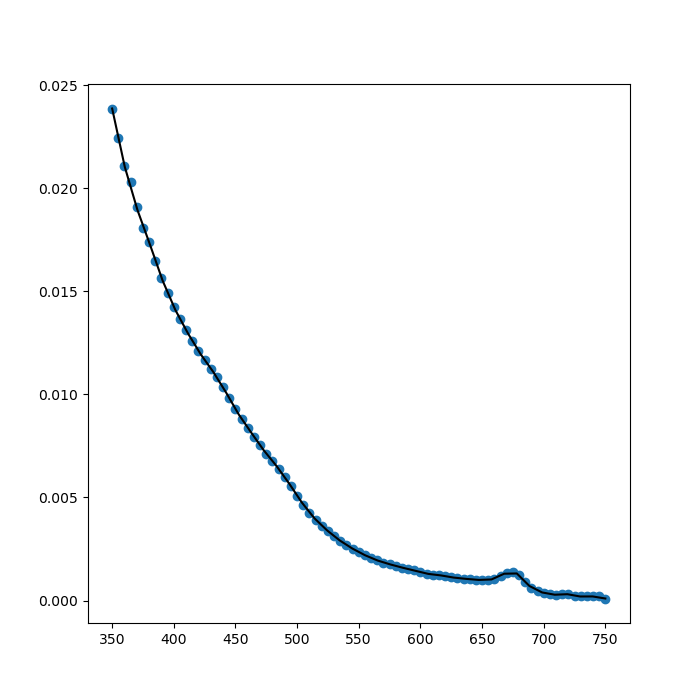

In [19]:
ss = 0

fig = plt.figure(figsize=(7,7))
ax = plt.gca()
#
ax.plot(l23_wave, spec[ss,:], 'o', label='Orig')
ax.plot(new_wave, new_spec[ss,:], 'k-', label='Int')

plt.show()